### Maximum Entropy Inverse Reinforcement Learning (MaxEnt IRL)

#### Problem Setup
The objective is to recover the reward function $R(s)$ in a Markov Decision Process (MDP) such that the demonstrated expert trajectories are most likely under a stochastic policy maximizing the entropy of the action distribution.

---

#### Transition Model
For an MDP with:
- $S$: number of states,
- $A$: number of actions,
- $P(s'|s,a)$: transition probabilities,
- $\gamma$: discount factor,

the expert trajectories $\mathcal{D}$ specify the state-action-next state tuples $(s, a, s')$ sampled from the expert policy.

---

#### Reward Function
The reward function is modeled as:
$$
R(s) = \phi(s)^T \theta,
$$
where:
- $\phi(s)$: feature vector for state $s$,
- $\theta$: parameter vector to be learned.

---

#### Feature Expectations
Feature expectations from expert trajectories $\mathcal{D}$ are:
$$
\mu_D = \frac{1}{|\mathcal{D}|} \sum_{\tau \in \mathcal{D}} \sum_{t=0}^\infty \gamma^t \phi(s_t),
$$
where $s_t$ is the state at time $t$ in trajectory $\tau$.

---

#### Policy Model
The stochastic policy $\pi(a|s)$ is derived from the softmax of the $Q$-values:
$$
\pi(a|s) = \frac{\exp(Q(s, a))}{\sum_{a'} \exp(Q(s, a'))},
$$
where:
$$
Q(s, a) = R(s) + \gamma \sum_{s'} P(s'|s, a) V(s'),
$$
and the value function $V(s)$ is:
$$
V(s) = \log \sum_a \exp(Q(s, a)).
$$

---

#### State Visitation Frequencies
The expected state visitation frequencies under the policy $\pi(a|s)$ are:
$$
\text{svf}(s) = \sum_{t=0}^\infty \gamma^t D_t(s),
$$
where $D_t(s)$ is the state distribution at time $t$, computed iteratively:
$$
D_{t+1}(s') = \sum_{s,a} D_t(s) \pi(a|s) P(s'|s, a).
$$

---

#### Optimization Objective
MaxEnt IRL optimizes $\theta$ to match feature expectations under the learned policy $\pi$ with the expert feature expectations:
$$
\min_\theta \|\mu_D - \mu_\pi\|^2,
$$
where:
- $\mu_\pi = \sum_s \text{svf}(s) \phi(s)$,
- $\mu_D$: feature expectations from expert trajectories.

---

#### Algorithm Steps
1. **Initialization**:
   - Compute expert feature expectations $\mu_D$ from trajectories.
   - Initialize $\theta$ randomly.

2. **Reward Function**:
   - Compute $R(s) = \phi(s)^T \theta$.

3. **Value Function**:
   - Solve for $V(s)$ using the Maximum Entropy value iteration:
   $$
   V(s) = \log \sum_a \exp \left(R(s) + \gamma \sum_{s'} P(s'|s, a) V(s') \right).
   $$

4. **Policy**:
   - Compute the stochastic policy:
   $$
   \pi(a|s) = \frac{\exp \left(R(s) + \gamma \sum_{s'} P(s'|s, a) V(s') \right)}{\sum_{a'} \exp \left(R(s) + \gamma \sum_{s'} P(s'|s, a') V(s') \right)}.
   $$

5. **State Visitation Frequencies**:
   - Estimate $\text{svf}(s)$ iteratively using:
   $$
   D_{t+1}(s') = \sum_{s,a} D_t(s) \pi(a|s) P(s'|s, a).
   $$

6. **Gradient Update**:
   - Compute gradient:
   $$
   \nabla_\theta = \mu_D - \mu_\pi.
   $$
   - Update $\theta$:
   $$
   \theta \gets \theta + \eta \nabla_\theta,
   $$
   where $\eta$ is the learning rate.

7. **Convergence**:
   - Repeat until $\|\mu_D - \mu_\pi\|$ is below a threshold.

---

#### Experimental Setup
- **MDP Properties**:
  - $S = 10$: number of states,
  - $A = 10$: number of actions,
  - $\gamma = 0.9$: discount factor,
  - Maximum reward $R_{\text{max}} = 10$.

- **Simulation**:
  1. Generate random MDP parameters $R_{\text{true}}$ and $P(s'|s,a)$.
  2. Compute expert policy $\pi^*$ using $R_{\text{true}}$ and value iteration.
  3. Generate $50$ expert trajectories $\mathcal{D}$.
  4. Apply MaxEnt IRL to recover $R_{\text{est}}$.
  5. Compare $R_{\text{true}}$ with $R_{\text{est}}$ and $\pi^*$ with the estimated policy.

---

#### Visualization
1. **Rewards**:
   - Bar plot comparing $R_{\text{true}}$ and $R_{\text{est}}$.
2. **Policies**:
   - Line plot comparing $\pi^*$ and the estimated policy.

---

#### Iterative Algorithm Summary
1. Initialize $\theta$ and compute $\mu_D$.
2. For each iteration:
   - Compute $R(s)$, $V(s)$, $\pi(a|s)$, and $\text{svf}(s)$.
   - Update $\theta$ using the gradient $\nabla_\theta = \mu_D - \mu_\pi$.
3. Repeat until convergence.

Iteration 0, Loss: 1.1899722644036834
Iteration 1, Loss: 1.1857924028487095
Iteration 2, Loss: 1.181623124343301
Iteration 3, Loss: 1.1774644456061847
Iteration 4, Loss: 1.1733163856208255
Iteration 5, Loss: 1.1691789656254166
Iteration 6, Loss: 1.1650522090971498
Iteration 7, Loss: 1.1609361417310071
Iteration 8, Loss: 1.1568307914133205
Iteration 9, Loss: 1.1527361881903426
Iteration 10, Loss: 1.148652364232073
Iteration 11, Loss: 1.1445793537915765
Iteration 12, Loss: 1.1405171931600482
Iteration 13, Loss: 1.1364659206178582
Iteration 14, Loss: 1.1324255763818232
Iteration 15, Loss: 1.1283962025489467
Iteration 16, Loss: 1.1243778430368518
Iteration 17, Loss: 1.1203705435211675
Iteration 18, Loss: 1.1163743513700668
Iteration 19, Loss: 1.112389315576226
Iteration 20, Loss: 1.1084154866863793
Iteration 21, Loss: 1.1044529167287516
Iteration 22, Loss: 1.1005016591385355
Iteration 23, Loss: 1.0965617686816482
Iteration 24, Loss: 1.0926333013769836
Iteration 25, Loss: 1.0887163144173464

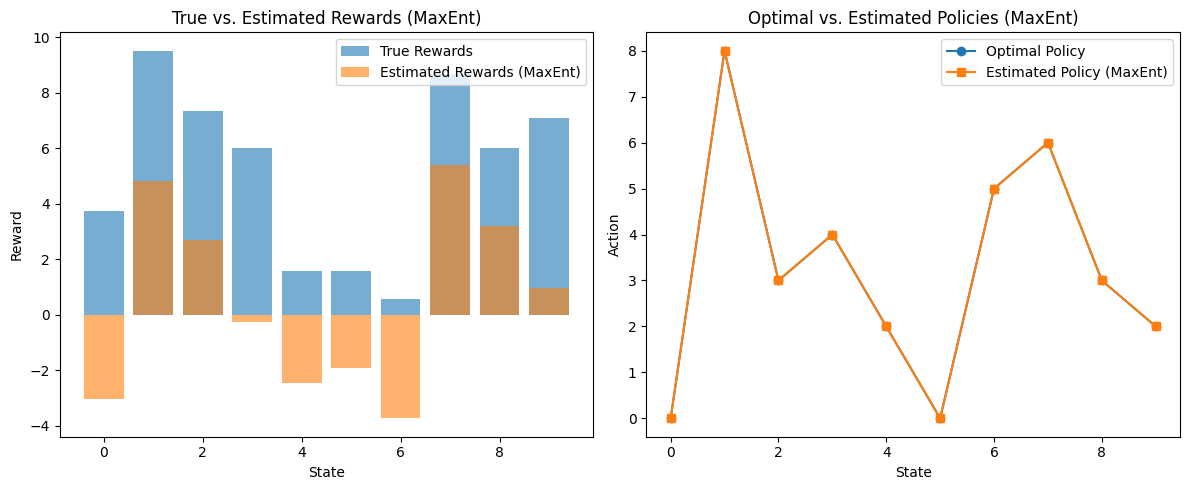

True Reward Function:
[3.75 9.51 7.32 5.99 1.56 1.56 0.58 8.66 6.01 7.08]

Estimated Reward Function (MaxEnt):
[-3.02  4.81  2.67 -0.25 -2.46 -1.92 -3.73  5.39  3.2   0.96]

Difference in Reward Function:
[6.77 4.7  4.65 6.23 4.02 3.48 4.31 3.27 2.82 6.12]

Optimal Policy:
[0 8 3 4 2 0 5 6 3 2]

Estimated Policy (MaxEnt):
[0 8 3 4 2 0 5 6 3 2]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv

def generate_random_mdp(num_states, num_actions, max_reward):
    R_true = np.random.uniform(0, max_reward, size=num_states)
    Pssa = np.zeros((num_states, num_states, num_actions))
    for s in range(num_states):
        for a in range(num_actions):
            probabilities = np.random.rand(num_states)
            probabilities /= probabilities.sum()
            Pssa[s, :, a] = probabilities
    return R_true, Pssa

def value_iteration(num_states, num_actions, rewards, transition_probabilities, discount_factor, epsilon=1e-6, max_iterations=1000):
    V = np.zeros(num_states)
    policy = np.zeros(num_states, dtype=int)
    for _ in range(max_iterations):
        V_prev = V.copy()
        Q = np.zeros((num_states, num_actions))
        for s in range(num_states):
            for a in range(num_actions):
                Q[s, a] = rewards[s] + discount_factor * transition_probabilities[s, :, a] @ V_prev
        V_new = np.max(Q, axis=1)
        policy = np.argmax(Q, axis=1)
        if np.max(np.abs(V_new - V_prev)) < epsilon:
            V = V_new
            break
        V = V_new
    return V, policy

def generate_trajectory(Pssa, policy, start_state, num_states, max_steps=100):
    trajectory = []
    state = start_state
    for _ in range(max_steps):
        action = policy[state]
        next_state_prob = Pssa[state, :, action]
        next_state = np.random.choice(range(num_states), p=next_state_prob)
        trajectory.append((state, action, next_state))
        state = next_state
    return trajectory

def generate_trajectories(num_trajectories, Pssa, policy, num_states, start_states=None, max_steps=100):
    trajectories = []
    if start_states is None:
        start_states = range(num_states)
    for _ in range(num_trajectories):
        start_state = np.random.choice(start_states)
        traj = generate_trajectory(Pssa, policy, start_state, num_states, max_steps)
        trajectories.append(traj)
    return trajectories

def state_features(num_states):
    return np.identity(num_states)

def feature_expectations(features, trajectories, discount_factor):
    num_features = features.shape[1]
    mu = np.zeros(num_features)
    for traj in trajectories:
        for t, (s, a, s_next) in enumerate(traj):
            mu += (discount_factor ** t) * features[s]
    mu /= len(trajectories)
    return mu

def initial_state_distribution(num_states, trajectories):
    d0 = np.zeros(num_states)
    for traj in trajectories:
        start_state = traj[0][0]
        d0[start_state] += 1
    d0 /= len(trajectories)
    return d0

def maxent_value_iteration(num_states, num_actions, Pssa, reward, discount, eps=1e-5):
    V = np.zeros(num_states)
    delta = np.inf
    while delta > eps:
        V_old = V.copy()
        Q = np.zeros((num_states, num_actions))
        for s in range(num_states):
            for a in range(num_actions):
                Q[s, a] = reward[s] + discount * Pssa[s, :, a] @ V_old
        V = np.log(np.sum(np.exp(Q - np.max(Q, axis=1, keepdims=True)), axis=1)) + np.max(Q, axis=1)
        delta = np.max(np.abs(V - V_old))
    return V

def compute_policy(num_states, num_actions, Pssa, reward, V, discount):
    Q = np.zeros((num_states, num_actions))
    for s in range(num_states):
        for a in range(num_actions):
            Q[s, a] = reward[s] + discount * Pssa[s, :, a] @ V
    Q -= np.max(Q, axis=1, keepdims=True)  # For numerical stability
    policy = np.exp(Q)
    policy /= np.sum(policy, axis=1, keepdims=True)
    return policy

def expected_state_visitation_frequencies(num_states, num_actions, Pssa, policy, d0, discount_factor, T):
    D = np.zeros((T, num_states))
    D[0, :] = d0
    for t in range(T - 1):
        for s in range(num_states):
            for a in range(num_actions):
                D[t + 1, :] += discount_factor * D[t, s] * policy[s, a] * Pssa[s, :, a]
    svf = np.sum(D, axis=0)
    return svf

def maxent_irl(num_states, num_actions, Pssa, trajectories, discount, learning_rate=0.1, num_iterations=100, eps=1e-5):
    # Initialize parameters
    features = state_features(num_states)  # Identity matrix
    num_features = features.shape[1]
    theta = np.random.uniform(size=num_features)
    mu_D = feature_expectations(features, trajectories, discount)
    d0 = initial_state_distribution(num_states, trajectories)
    T = 100  # Set T large enough to approximate infinite horizon
    for iteration in range(num_iterations):
        # Compute reward function
        reward = features @ theta
        # Compute value function
        V = maxent_value_iteration(num_states, num_actions, Pssa, reward, discount, eps)
        # Compute policy
        policy = compute_policy(num_states, num_actions, Pssa, reward, V, discount)
        # Compute expected state visitation frequencies
        svf = expected_state_visitation_frequencies(num_states, num_actions, Pssa, policy, d0, discount, T)
        # Compute feature expectations under the policy
        mu_theta = features.T @ svf
        # Update theta
        grad = mu_D - mu_theta
        theta += learning_rate * grad
        # Optional: Print the loss to monitor convergence
        loss = np.linalg.norm(mu_D - mu_theta)
        print(f"Iteration {iteration}, Loss: {loss}")
    # Return the estimated reward function
    reward = features @ theta
    return reward

# Parameters
num_states = 10
num_actions = 10
discount_factor = 0.9
max_reward = 10.0
np.random.seed(42)

# Generate random MDP
R_true, Pssa = generate_random_mdp(num_states, num_actions, max_reward)

# Compute optimal policy
V_opt, policy_opt = value_iteration(num_states, num_actions, R_true, Pssa, discount_factor)

# Generate expert trajectories
num_trajectories = 50
trajectories = generate_trajectories(num_trajectories, Pssa, policy_opt, num_states)

# Apply MaxEnt IRL
R_est_maxent = maxent_irl(num_states, num_actions, Pssa, trajectories, discount_factor)

# Compute estimated policy from estimated rewards
V_est_maxent, policy_est_maxent = value_iteration(num_states, num_actions, R_est_maxent, Pssa, discount_factor)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(range(num_states), R_true, alpha=0.6, label='True Rewards')
plt.bar(range(num_states), R_est_maxent, alpha=0.6, label='Estimated Rewards (MaxEnt)')
plt.title('True vs. Estimated Rewards (MaxEnt)')
plt.xlabel('State')
plt.ylabel('Reward')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_states), policy_opt, 'o-', label='Optimal Policy')
plt.plot(range(num_states), policy_est_maxent, 's-', label='Estimated Policy (MaxEnt)')
plt.title('Optimal vs. Estimated Policies (MaxEnt)')
plt.xlabel('State')
plt.ylabel('Action')
plt.legend()

plt.tight_layout()
plt.show()

# Printing rewards and policies
np.set_printoptions(precision=2, suppress=True)

print("True Reward Function:")
print(R_true)

print("\nEstimated Reward Function (MaxEnt):")
print(R_est_maxent)

print("\nDifference in Reward Function:")
print(R_true - R_est_maxent)

print("\nOptimal Policy:")
print(policy_opt)

print("\nEstimated Policy (MaxEnt):")
print(policy_est_maxent)

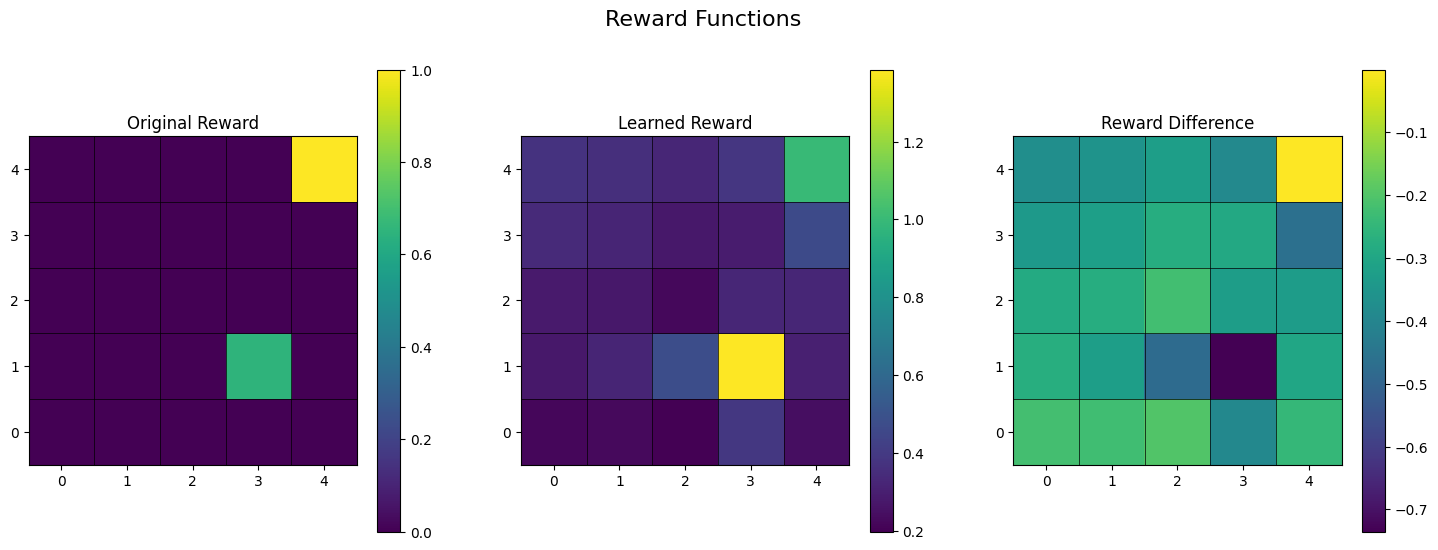

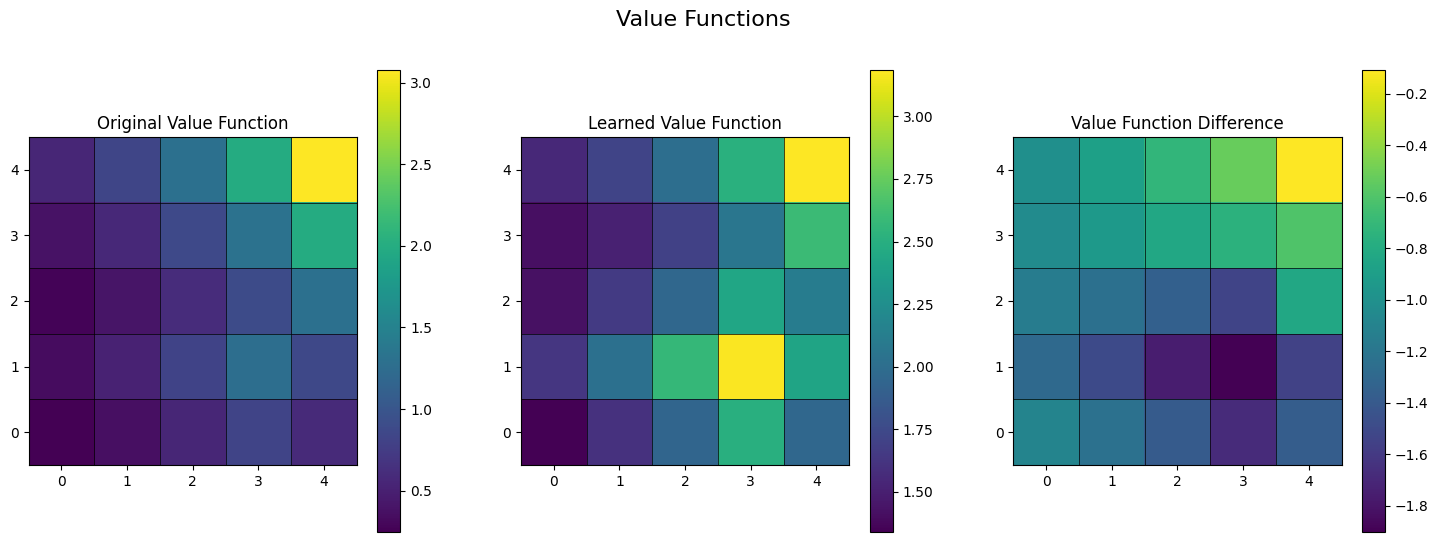

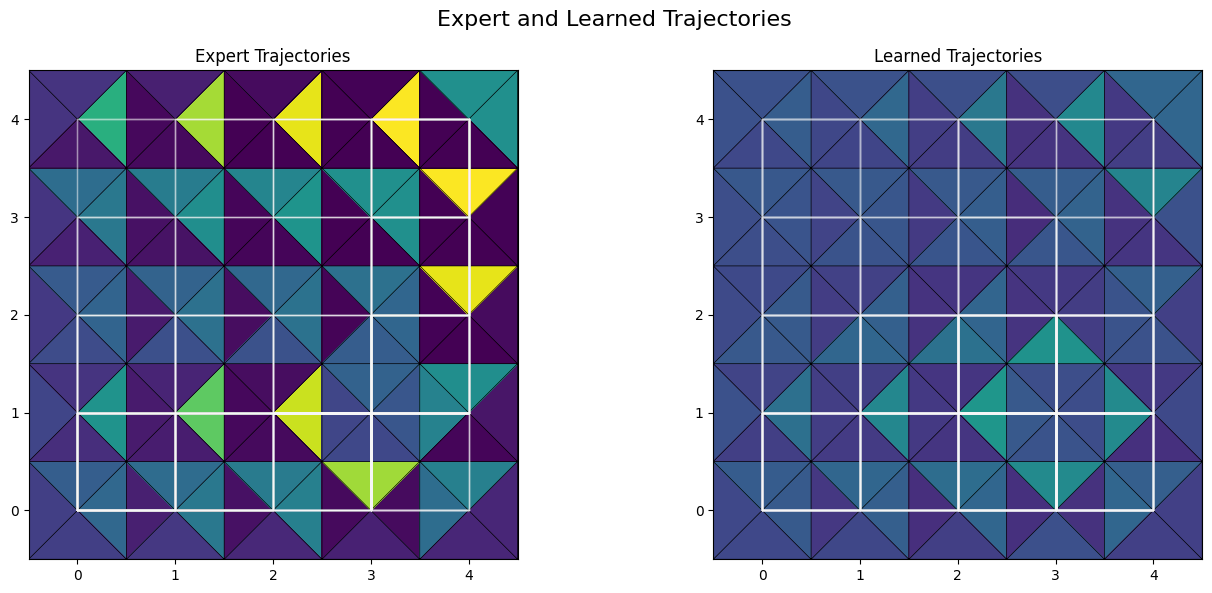


Original Reward Function:
[[0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.65 0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.  ]]

Learned Reward Function:
[[0.22 0.23 0.2  0.39 0.24]
 [0.28 0.32 0.48 1.39 0.3 ]
 [0.29 0.28 0.22 0.33 0.33]
 [0.34 0.32 0.28 0.29 0.46]
 [0.37 0.36 0.32 0.39 1.  ]]

Difference in Reward Function:
[[-0.22 -0.23 -0.2  -0.39 -0.24]
 [-0.28 -0.32 -0.48 -0.74 -0.3 ]
 [-0.29 -0.28 -0.22 -0.33 -0.33]
 [-0.34 -0.32 -0.28 -0.29 -0.46]
 [-0.37 -0.36 -0.32 -0.39 -0.  ]]

Original Value Function:
[[0.25 0.37 0.55 0.82 0.58]
 [0.34 0.52 0.81 1.27 0.86]
 [0.28 0.41 0.6  0.89 1.29]
 [0.38 0.57 0.87 1.32 1.99]
 [0.55 0.84 1.29 1.99 3.08]]

Learned Value Function:
[[1.34 1.6  1.94 2.5  1.95]
 [1.63 2.02 2.57 3.17 2.41]
 [1.42 1.65 1.95 2.43 2.12]
 [1.42 1.51 1.7  2.07 2.6 ]
 [1.55 1.72 2.01 2.51 3.18]]

Difference in Value Function:
[[-1.09 -1.23 -1.39 -1.68 -1.37]
 [-1.29 -1.5  -1.76 -1.9  -1.55]
 [-1.15 -1.24 -1.35 -1.54 -0.82]
 [-1

In [7]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.tri as tri

class GridWorld:
    def __init__(self, size):
        self.size = size
        self.actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        self.n_states = size**2
        self.n_actions = len(self.actions)
        self.p_transition = self._transition_prob_table()
    def state_index_to_point(self, state):
        return state % self.size, state // self.size
    def state_point_to_index(self, state):
        return state[1] * self.size + state[0]
    def state_point_to_index_clipped(self, state):
        s = (max(0, min(self.size - 1, state[0])), max(0, min(self.size - 1, state[1])))
        return self.state_point_to_index(s)
    def state_index_transition(self, s, a):
        s = self.state_index_to_point(s)
        s = s[0] + self.actions[a][0], s[1] + self.actions[a][1]
        return self.state_point_to_index_clipped(s)
    def _transition_prob_table(self):
        table = np.zeros((self.n_states, self.n_states, self.n_actions))
        s1, s2, a = range(self.n_states), range(self.n_states), range(self.n_actions)
        for s_from, s_to, a in product(s1, s2, a):
            table[s_from, s_to, a] = self._transition_prob(s_from, s_to, a)
        return table
    def _transition_prob(self, s_from, s_to, a):
        fx, fy = self.state_index_to_point(s_from)
        tx, ty = self.state_index_to_point(s_to)
        ax, ay = self.actions[a]
        if fx + ax == tx and fy + ay == ty:
            return 1.0
        if fx == tx and fy == ty:
            if not 0 <= fx + ax < self.size or not 0 <= fy + ay < self.size:
                return 1.0
        return 0.0
    def __repr__(self):
        return "GridWorld(size={})".format(self.size)

class IcyGridWorld(GridWorld):
    def __init__(self, size, p_slip=0.2):
        self.p_slip = p_slip
        super().__init__(size)
    def _transition_prob(self, s_from, s_to, a):
        fx, fy = self.state_index_to_point(s_from)
        tx, ty = self.state_index_to_point(s_to)
        ax, ay = self.actions[a]
        if fx + ax == tx and fy + ay == ty:
            return 1.0 - self.p_slip + self.p_slip / self.n_actions
        if abs(fx - tx) + abs(fy - ty) == 1:
            return self.p_slip / self.n_actions
        if fx == tx and fy == ty:
            if not 0 <= fx + ax < self.size or not 0 <= fy + ay < self.size:
                if not 0 < fx < self.size - 1 and not 0 < fy < self.size - 1:
                    return 1.0 - self.p_slip + 2.0 * self.p_slip / self.n_actions
                return 1.0 - self.p_slip + self.p_slip / self.n_actions
            if not 0 < fx < self.size - 1 and not 0 < fy < self.size - 1:
                return 2.0 * self.p_slip / self.n_actions
            if not 0 < fx < self.size - 1 or not 0 < fy < self.size - 1:
                return self.p_slip / self.n_actions
            return 0.0
        return 0.0
    def __repr__(self):
        return "IcyGridWorld(size={}, p_slip={})".format(self.size, self.p_slip)

def state_features(world):
    return np.identity(world.n_states)

def coordinate_features(world):
    features = np.zeros((world.n_states, world.size))
    for s in range(world.n_states):
        x, y = world.state_index_to_point(s)
        features[s, x] += 1
        features[s, y] += 1
    return features

def feature_expectation_from_trajectories(features, trajectories):
    n_states, n_features = features.shape
    fe = np.zeros(n_features)
    for t in trajectories:
        for s in t.states():
            fe += features[s, :]
    return fe / len(trajectories)

def initial_probabilities_from_trajectories(n_states, trajectories):
    p = np.zeros(n_states)
    for t in trajectories:
        p[t.transitions()[0][0]] += 1.0
    return p / len(trajectories)

def expected_svf_from_policy(p_transition, p_initial, terminal, p_action, eps=1e-5):
    n_states, _, n_actions = p_transition.shape
    p_transition = np.copy(p_transition)
    p_transition[terminal, :, :] = 0.0
    p_transition = [np.array(p_transition[:, :, a]) for a in range(n_actions)]
    d = np.zeros(n_states)
    delta = np.inf
    while delta > eps:
        d_ = [p_transition[a].T.dot(p_action[:, a] * d) for a in range(n_actions)]
        d_ = p_initial + np.array(d_).sum(axis=0)
        delta, d = np.max(np.abs(d_ - d)), d_
    return d

def local_action_probabilities(p_transition, terminal, reward):
    n_states, _, n_actions = p_transition.shape
    er = np.exp(reward)
    p = [np.array(p_transition[:, :, a]) for a in range(n_actions)]
    zs = np.zeros(n_states)
    zs[terminal] = 1.0
    for _ in range(2 * n_states):
        za = np.array([er * p[a].dot(zs) for a in range(n_actions)]).T
        zs = za.sum(axis=1)
    return za / zs[:, None]

def compute_expected_svf(p_transition, p_initial, terminal, reward, eps=1e-5):
    p_action = local_action_probabilities(p_transition, terminal, reward)
    return expected_svf_from_policy(p_transition, p_initial, terminal, p_action, eps)

def irl(p_transition, features, terminal, trajectories, optim, init, eps=1e-4, eps_esvf=1e-5):
    n_states, _, n_actions = p_transition.shape
    _, n_features = features.shape
    e_features = feature_expectation_from_trajectories(features, trajectories)
    p_initial = initial_probabilities_from_trajectories(n_states, trajectories)
    theta = init(n_features)
    delta = np.inf
    optim.reset(theta)
    while delta > eps:
        theta_old = theta.copy()
        reward = features.dot(theta)
        e_svf = compute_expected_svf(p_transition, p_initial, terminal, reward, eps_esvf)
        grad = e_features - features.T.dot(e_svf)
        optim.step(grad)
        delta = np.max(np.abs(theta_old - theta))
    return features.dot(theta)

def softmax(x1, x2):
    x_max = np.maximum(x1, x2)
    x_min = np.minimum(x1, x2)
    return x_max + np.log(1.0 + np.exp(x_min - x_max))

def local_causal_action_probabilities(p_transition, terminal, reward, discount, eps=1e-5):
    n_states, _, n_actions = p_transition.shape
    if len(terminal) == n_states:
        reward_terminal = np.array(terminal, dtype=float)
    else:
        reward_terminal = -np.inf * np.ones(n_states)
        reward_terminal[terminal] = 0.0
    p = [np.array(p_transition[:, :, a]) for a in range(n_actions)]
    v = -1e200 * np.ones(n_states)
    delta = np.inf
    while delta > eps:
        v_old = v
        q = np.array([reward + discount * p[a].dot(v_old) for a in range(n_actions)]).T
        v = reward_terminal
        for a in range(n_actions):
            v = softmax(v, q[:, a])
        v = np.array(v, dtype=float)
        delta = np.max(np.abs(v - v_old))
    return np.exp(q - v[:, None])

def compute_expected_causal_svf(p_transition, p_initial, terminal, reward, discount,
                                eps_lap=1e-5, eps_svf=1e-5):
    p_action = local_causal_action_probabilities(p_transition, terminal, reward, discount, eps_lap)
    return expected_svf_from_policy(p_transition, p_initial, terminal, p_action, eps_svf)

def irl_causal(p_transition, features, terminal, trajectories, optim, init, discount,
               eps=1e-4, eps_svf=1e-5, eps_lap=1e-5):
    n_states, _, n_actions = p_transition.shape
    _, n_features = features.shape
    e_features = feature_expectation_from_trajectories(features, trajectories)
    p_initial = initial_probabilities_from_trajectories(n_states, trajectories)
    theta = init(n_features)
    delta = np.inf
    optim.reset(theta)
    while delta > eps:
        theta_old = theta.copy()
        reward = features.dot(theta)
        e_svf = compute_expected_causal_svf(p_transition, p_initial, terminal, reward, discount,
                                            eps_lap, eps_svf)
        grad = e_features - features.T.dot(e_svf)
        optim.step(grad)
        delta = np.max(np.abs(theta_old - theta))
    return features.dot(theta)

class Optimizer:
    def __init__(self):
        self.parameters = None
    def reset(self, parameters):
        self.parameters = parameters
    def step(self, grad, *args, **kwargs):
        raise NotImplementedError
    def normalize_grad(self, ord=None):
        return NormalizeGrad(self, ord)

class Sga(Optimizer):
    def __init__(self, lr):
        super().__init__()
        self.lr = lr
        self.k = 0
    def reset(self, parameters):
        super().reset(parameters)
        self.k = 0
    def step(self, grad, *args, **kwargs):
        lr = self.lr if not callable(self.lr) else self.lr(self.k)
        self.k += 1
        self.parameters += lr * grad

class ExpSga(Optimizer):
    def __init__(self, lr, normalize=False):
        super().__init__()
        self.lr = lr
        self.normalize = normalize
        self.k = 0
    def reset(self, parameters):
        super().reset(parameters)
        self.k = 0
    def step(self, grad, *args, **kwargs):
        lr = self.lr if not callable(self.lr) else self.lr(self.k)
        self.k += 1
        self.parameters *= np.exp(lr * grad)
        if self.normalize:
            self.parameters /= self.parameters.sum()

class NormalizeGrad(Optimizer):
    def __init__(self, opt, ord=None):
        super().__init__()
        self.opt = opt
        self.ord = ord
    def reset(self, parameters):
        super().reset(parameters)
        self.opt.reset(parameters)
    def step(self, grad, *args, **kwargs):
        return self.opt.step(grad / np.linalg.norm(grad, self.ord), *args, **kwargs)

def linear_decay(lr0=0.2, decay_rate=1.0, decay_steps=1):
    def _lr(k):
        return lr0 / (1.0 + decay_rate * np.floor(k / decay_steps))
    return _lr

def power_decay(lr0=0.2, decay_rate=1.0, decay_steps=1, power=2):
    def _lr(k):
        return lr0 / (decay_rate * np.floor(k / decay_steps) + 1.0)**power
    return _lr

def exponential_decay(lr0=0.2, decay_rate=0.5, decay_steps=1):
    def _lr(k):
        return lr0 * np.exp(-decay_rate * np.floor(k / decay_steps))
    return _lr

class Initializer:
    def __init__(self):
        pass
    def initialize(self, shape):
        raise NotImplementedError
    def __call__(self, shape):
        return self.initialize(shape)

class Uniform(Initializer):
    def __init__(self, low=0.0, high=1.0):
        super().__init__()
        self.low = low
        self.high = high
    def initialize(self, shape):
        return np.random.uniform(size=shape, low=self.low, high=self.high)

class Constant(Initializer):
    def __init__(self, value=1.0):
        super().__init__()
        self.value = value
    def initialize(self, shape):
        if callable(self.value):
            return np.ones(shape) * self.value(shape)
        else:
            return np.ones(shape) * self.value

def plot_transition_probabilities(ax, world, border=None, **kwargs):
    xy = [(x - 0.5, y - 0.5) for y, x in product(range(world.size + 1), range(world.size + 1))]
    xy += [(x, y) for y, x in product(range(world.size), range(world.size))]
    t, v = [], []
    for sy, sx in product(range(world.size), range(world.size)):
        state = world.state_point_to_index((sx, sy))
        state_r = world.state_point_to_index_clipped((sx + 1, sy))
        state_l = world.state_point_to_index_clipped((sx - 1, sy))
        state_t = world.state_point_to_index_clipped((sx, sy + 1))
        state_b = world.state_point_to_index_clipped((sx, sy - 1))
        bl, br = sy * (world.size + 1) + sx, sy * (world.size + 1) + sx + 1
        tl, tr = (sy + 1) * (world.size + 1) + sx, (sy + 1) * (world.size + 1) + sx + 1
        cc = (world.size + 1)**2 + sy * world.size + sx
        t += [(tr, cc, br)]
        t += [(tl, bl, cc)]
        t += [(tl, cc, tr)]
        t += [(bl, br, cc)]
        v += [world.p_transition[state, state_r, 0]]
        v += [world.p_transition[state, state_l, 1]]
        v += [world.p_transition[state, state_t, 2]]
        v += [world.p_transition[state, state_b, 3]]
    x, y = zip(*xy)
    x, y = np.array(x), np.array(y)
    t, v = np.array(t), np.array(v)
    ax.set_aspect('equal')
    ax.set_xticks(range(world.size))
    ax.set_yticks(range(world.size))
    ax.set_xlim(-0.5, world.size - 0.5)
    ax.set_ylim(-0.5, world.size - 0.5)
    p = ax.tripcolor(x, y, t, facecolors=v, vmin=0.0, vmax=1.0, **kwargs)
    if border is not None:
        ax.triplot(x, y, t, **border)
    return p

def plot_state_values(ax, world, values, border, **kwargs):
    p = ax.imshow(np.reshape(values, (world.size, world.size)), origin='lower', **kwargs)
    if border is not None:
        for i in range(0, world.size + 1):
            ax.plot([i - 0.5, i - 0.5], [-0.5, world.size - 0.5], **border, label=None)
            ax.plot([-0.5, world.size - 0.5], [i - 0.5, i - 0.5], **border, label=None)
    return p

def plot_deterministic_policy(ax, world, policy, **kwargs):
    arrow_direction = [(0.33, 0), (-0.33, 0), (0, 0.33), (0, -0.33)]
    for state in range(world.n_states):
        cx, cy = world.state_index_to_point(state)
        dx, dy = arrow_direction[policy[state]]
        ax.arrow(cx - 0.5 * dx, cy - 0.5 * dy, dx, dy, head_width=0.1, **kwargs)

def plot_stochastic_policy(ax, world, policy, border=None, **kwargs):
    xy = [(x - 0.5, y - 0.5) for y, x in product(range(world.size + 1), range(world.size + 1))]
    xy += [(x, y) for y, x in product(range(world.size), range(world.size))]
    t, v = [], []
    for sy, sx in product(range(world.size), range(world.size)):
        state = world.state_point_to_index((sx, sy))
        bl, br = sy * (world.size + 1) + sx, sy * (world.size + 1) + sx + 1
        tl, tr = (sy + 1) * (world.size + 1) + sx, (sy + 1) * (world.size + 1) + sx + 1
        cc = (world.size + 1)**2 + sy * world.size + sx
        t += [(tr, cc, br)]
        t += [(tl, bl, cc)]
        t += [(tl, cc, tr)]
        t += [(bl, br, cc)]
        v += [policy[state, 0]]
        v += [policy[state, 1]]
        v += [policy[state, 2]]
        v += [policy[state, 3]]
    x, y = zip(*xy)
    x, y = np.array(x), np.array(y)
    t, v = np.array(t), np.array(v)
    ax.set_aspect('equal')
    ax.set_xticks(range(world.size))
    ax.set_yticks(range(world.size))
    ax.set_xlim(-0.5, world.size - 0.5)
    ax.set_ylim(-0.5, world.size - 0.5)
    p = ax.tripcolor(x, y, t, facecolors=v, vmin=0.0, vmax=1.0, **kwargs)
    if border is not None:
        ax.triplot(x, y, t, **border)
    return p

def plot_trajectory(ax, world, trajectory, **kwargs):
    xy = [world.state_index_to_point(s) for s in trajectory.states()]
    x, y = zip(*xy)
    return ax.plot(x, y, **kwargs)

def value_iteration(p, reward, discount, eps=1e-3):
    n_states, _, n_actions = p.shape
    v = np.zeros(n_states)
    p = [np.matrix(p[:, :, a]) for a in range(n_actions)]
    delta = np.inf
    while delta > eps:
        v_old = v
        q = discount * np.array([p[a] @ v for a in range(n_actions)])
        v = reward + np.max(q, axis=0)[0]
        delta = np.max(np.abs(v_old - v))
    return v

def stochastic_value_iteration(p, reward, discount, eps=1e-3):
    n_states, _, n_actions = p.shape
    v = np.zeros(n_states)
    p = [np.matrix(p[:, :, a]) for a in range(n_actions)]
    delta = np.inf
    while delta > eps:
        v_old = v
        q = discount * np.array([p[a] @ v for a in range(n_actions)])
        v = reward + np.average(q, axis=0)[0]
        delta = np.max(np.abs(v_old - v))
    return v

def optimal_policy_from_value(world, value):
    policy = np.array([
        np.argmax([value[world.state_index_transition(s, a)] for a in range(world.n_actions)])
        for s in range(world.n_states)
    ])
    return policy

def optimal_policy(world, reward, discount, eps=1e-3):
    value = value_iteration(world.p_transition, reward, discount, eps)
    return optimal_policy_from_value(world, value)

def stochastic_policy_from_value(world, value, w=lambda x: x):
    value = np.exp(value)
    q = np.array([
        np.array([w(value[world.state_index_transition(s, a)]) for a in range(world.n_actions)])
        for s in range(world.n_states)
    ])
    return q / np.sum(q, axis=1)[:, None]

from itertools import chain

class Trajectory:
    def __init__(self, transitions):
        self._t = transitions
    def transitions(self):
        return self._t
    def states(self):
        return map(lambda x: x[0], chain(self._t, [(self._t[-1][2], 0, 0)]))
    def __repr__(self):
        return "Trajectory({})".format(repr(self._t))
    def __str__(self):
        return "{}".format(self._t)

def generate_trajectory(world, policy, start, final):
    state = start
    trajectory = []
    while state not in final:
        action = policy(state)
        next_s = range(world.n_states)
        next_p = world.p_transition[state, :, action]
        next_state = np.random.choice(next_s, p=next_p)
        trajectory += [(state, action, next_state)]
        state = next_state
    return Trajectory(trajectory)

def generate_trajectories(n, world, policy, start, final):
    start_states = np.atleast_1d(start)
    def _generate_one():
        if len(start_states) == world.n_states:
            s = np.random.choice(range(world.n_states), p=start_states)
        else:
            s = np.random.choice(start_states)
        return generate_trajectory(world, policy, s, final)
    return (_generate_one() for _ in range(n))

def policy_adapter(policy):
    return lambda state: policy[state]

def stochastic_policy_adapter(policy):
    return lambda state: np.random.choice([*range(policy.shape[1])], p=policy[state, :])

def setup_mdp():
    world = IcyGridWorld(size=5, p_slip=0.2)
    reward = np.zeros(world.n_states)
    reward[-1] = 1.0
    reward[8] = 0.65
    terminal = [24]
    return world, reward, terminal

def generate_expert_trajectories(world, reward, terminal):
    n_trajectories = 200
    discount = 0.7
    weighting = lambda x: x**5
    initial = np.zeros(world.n_states)
    initial[0] = 1.0
    value = value_iteration(world.p_transition, reward, discount)
    policy = stochastic_policy_from_value(world, value, w=weighting)
    policy_exec = stochastic_policy_adapter(policy)
    tjs = list(generate_trajectories(n_trajectories, world, policy_exec, initial, terminal))
    return tjs, policy

def maxent(world, terminal, trajectories):
    features = state_features(world)
    init = Constant(1.0)
    optim = ExpSga(lr=linear_decay(lr0=0.2))
    reward = irl(world.p_transition, features, terminal, trajectories, optim, init)
    return reward

def maxent_causal(world, terminal, trajectories, discount=0.7):
    features = state_features(world)
    init = Constant(1.0)
    optim = ExpSga(lr=linear_decay(lr0=0.2))
    reward = irl_causal(world.p_transition, features, terminal, trajectories, optim, init, discount)
    return reward

import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# (All the classes and functions remain the same as in your original code)
# Please ensure all previous definitions are included here

def main():
    style = {'border': {'color': 'black', 'linewidth': 0.5}}

    # Set up the MDP
    world, reward, terminal = setup_mdp()

    # Generate expert trajectories
    trajectories, expert_policy = generate_expert_trajectories(world, reward, terminal)

    # Learn reward function using MaxEnt
    reward_maxent = maxent(world, terminal, trajectories)

    # Compute the difference between original and learned reward
    reward_diff = reward - reward_maxent

    # Compute the value function for the original reward
    discount = 0.7
    value_original = value_iteration(world.p_transition, reward, discount)

    # Compute the value function for the learned reward
    value_maxent = value_iteration(world.p_transition, reward_maxent, discount)

    # Compute the difference between the value functions
    value_diff = value_original - value_maxent

    # Plot the original and learned reward functions and their difference
    fig1, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    fig1.suptitle('Reward Functions', fontsize=16)

    p = plot_state_values(axes1[0], world, reward, **style)
    axes1[0].set_title('Original Reward')
    fig1.colorbar(p, ax=axes1[0])

    p = plot_state_values(axes1[1], world, reward_maxent, **style)
    axes1[1].set_title('Learned Reward')
    fig1.colorbar(p, ax=axes1[1])

    p = plot_state_values(axes1[2], world, reward_diff, **style)
    axes1[2].set_title('Reward Difference')
    fig1.colorbar(p, ax=axes1[2])

    # Plot the value functions
    fig2, axes2 = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    fig2.suptitle('Value Functions', fontsize=16)

    p = plot_state_values(axes2[0], world, value_original, **style)
    axes2[0].set_title('Original Value Function')
    fig2.colorbar(p, ax=axes2[0])

    p = plot_state_values(axes2[1], world, value_maxent, **style)
    axes2[1].set_title('Learned Value Function')
    fig2.colorbar(p, ax=axes2[1])

    p = plot_state_values(axes2[2], world, value_diff, **style)
    axes2[2].set_title('Value Function Difference')
    fig2.colorbar(p, ax=axes2[2])

    # Generate trajectories from the learned policy
    policy_learned = stochastic_policy_from_value(world, value_maxent)
    policy_learned_exec = stochastic_policy_adapter(policy_learned)
    n_trajectories = 50
    initial = np.zeros(world.n_states)
    initial[0] = 1.0
    learned_trajectories = list(generate_trajectories(n_trajectories, world, policy_learned_exec, initial, terminal))

    # Plot expert and learned trajectories
    fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    fig3.suptitle('Expert and Learned Trajectories', fontsize=16)

    axes3[0].set_title('Expert Trajectories')
    plot_stochastic_policy(axes3[0], world, expert_policy, **style)
    for t in trajectories:
        plot_trajectory(axes3[0], world, t, lw=1, color='white', alpha=0.1)

    axes3[1].set_title('Learned Trajectories')
    plot_stochastic_policy(axes3[1], world, policy_learned, **style)
    for t in learned_trajectories:
        plot_trajectory(axes3[1], world, t, lw=1, color='white', alpha=0.1)

    plt.tight_layout()
    plt.show()

    # Print the reward functions and value functions in tabular form
    np.set_printoptions(precision=2, suppress=True)

    print("\nOriginal Reward Function:")
    print(np.reshape(reward, (world.size, world.size)))

    print("\nLearned Reward Function:")
    print(np.reshape(reward_maxent, (world.size, world.size)))

    print("\nDifference in Reward Function:")
    print(np.reshape(reward_diff, (world.size, world.size)))

    print("\nOriginal Value Function:")
    print(np.reshape(value_original, (world.size, world.size)))

    print("\nLearned Value Function:")
    print(np.reshape(value_maxent, (world.size, world.size)))

    print("\nDifference in Value Function:")
    print(np.reshape(value_diff, (world.size, world.size)))

if __name__ == '__main__':
    main()